In [34]:
import pandas as pd
import matplotlib.pyplot as plt

### User id

In [9]:
sample_submission = pd.read_csv('data/test-recsys/sample_submission.csv')
sample_submission.head(3)

,Id,Predicted
0,51,3239211 10720024 8493844 1965540 5009002 95218...
1,65,11693356 13392267 2464515 2245175 4748570 1134...
2,766,12773054 3692749 12726751 10041624 11893515 23...


In [19]:
test_user_ids = sample_submission['Id']
UNQ_test_user_ids = set(test_user_ids)
len(test_user_ids)

107068

In [20]:
len(UNQ_test_user_ids)

107068

In [99]:
tab_1_orders = pd.read_csv('data/test-recsys/kaggle_tab_1345/tab_1_orders.csv')
tab_1_orders.head(3)

,user_id,order_id,order_created_time,retailer,store_id,platform
0,72,17431000,2020-09-26 10:48:57,METRO,21,app
1,83,9718154,2020-05-08 09:46:18,METRO,87,web
2,142,10056850,2020-05-14 15:06:03,METRO,320,app


In [100]:
len(tab_1_orders)

2461958

In [101]:
data_user_ids = tab_1_orders['user_id']
UNQ_data_user_ids = set(data_user_ids)
len(UNQ_data_user_ids)

753572

In [21]:
UNQ_test_user_ids.issubset(UNQ_data_user_ids) 

False

In [102]:
intersect_user_ids = UNQ_test_user_ids.intersection(UNQ_data_user_ids)
len(intersect_user_ids)

104238

### Users

In [96]:
users = pd.read_csv('data/test-recsys/kaggle_tab_1345/tab_4_user_profiles.csv')
users.head(3)

,user_id,gender,bdate
0,2224890,NaN,NaN
1,1683001,male,1987-10-11
2,2102480,NaN,NaN


In [98]:
UNQ_users = set(users['user_id'])
len(UNQ_users)

436927

In [105]:
inter_data_users = UNQ_users.intersection(UNQ_data_user_ids)
len(inter_data_users)

117786

### Product id

In [24]:
tab_5_products = pd.read_csv('data/test-recsys/kaggle_tab_1345/tab_5_product_properties.csv')
tab_5_products.head(3)

,product_id,property_name,property_value
0,1,Вес,100 г
1,2,Вид,Молочный напиток
2,2,Вес,100 г


In [25]:
product_ids = set(tab_5_products['product_id'])
len(product_ids)

686344

### Distributions

In [27]:
min(tab_1_orders['order_created_time']), max(tab_1_orders['order_created_time'])

('2019-12-31 21:29:17', '2020-10-01 20:59:11')

In [33]:
tab_1_orders['year'] = tab_1_orders['order_created_time'].apply(lambda x: x[:4])
tab_1_orders['month'] = tab_1_orders['order_created_time'].apply(lambda x: x[5:7])
tab_1_orders['year_month'] = tab_1_orders['year'] + '_' + tab_1_orders['month']
tab_1_orders.head(3)

,user_id,order_id,order_created_time,retailer,store_id,platform,year,month,year_month
0,72,17431000,2020-09-26 10:48:57,METRO,21,app,2020,09,2020_09
1,83,9718154,2020-05-08 09:46:18,METRO,87,web,2020,05,2020_05
2,142,10056850,2020-05-14 15:06:03,METRO,320,app,2020,05,2020_05


In [85]:
year_month_counts = tab_1_orders['year_month'].value_counts()
year_month = ['2019_12', '2020_01', '2020_02', '2020_03', '2020_04', '2020_05', '2020_06', 
              '2020_07', '2020_08', '2020_09', '2020_10']
counts = [year_month_counts[date] for date in year_month]

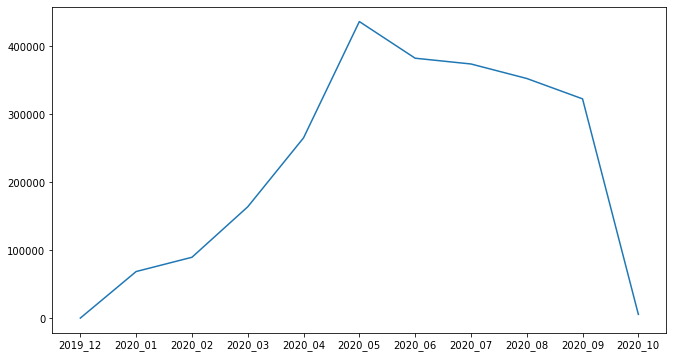

In [89]:
plt.figure(figsize=(11, 6))
plt.plot(year_month, counts)
plt.show()

### Сколько заказов на человека

In [92]:
tab_1_orders['user_id'].value_counts()

344968     205
224747     196
300421     185
958080     152
351997     144
          ... 
2558050      1
2570340      1
2566246      1
2582638      1
3357287      1
Name: user_id, Length: 753572, dtype: int64

In [95]:
344968 in UNQ_test_user_ids

True

In [107]:
import tqdm
import fnmatch
import os

In [114]:
!ls

"ls" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [117]:
tab_2_1 = fnmatch.filter(os.listdir('data/test-recsys/sbermarket_tab_2_1/'), 'tab_2*.csv')
print(tab_2_1)

products_2_1 = None

for file_name in tqdm.tqdm(tab_2_1):
#     key = file_name.split('_')[-1].split('.')[0]
    
    if products_2_1 is None:
        products_2_1 = pd.read_csv('data/test-recsys/sbermarket_tab_2_1/' + file_name)
    else:
        frame = pd.read_csv('data/test-recsys/sbermarket_tab_2_1/' + file_name)
        products_2_1.append(frame, ignore_index=True)
        
len(products_2_1)

  0%|          | 0/10 [00:00<?, ?it/s]

['tab_2_products_2020-01-01.csv', 'tab_2_products_2020-01-11.csv', 'tab_2_products_2020-01-21.csv', 'tab_2_products_2020-01-31.csv', 'tab_2_products_2020-02-10.csv', 'tab_2_products_2020-02-20.csv', 'tab_2_products_2020-03-01.csv', 'tab_2_products_2020-03-11.csv', 'tab_2_products_2020-03-21.csv', 'tab_2_products_2020-03-31.csv']


100%|██████████| 10/10 [00:16<00:00,  1.66s/it]


303667

In [118]:
tab_2_2 = fnmatch.filter(os.listdir('data/test-recsys/sbermarket_tab_2_2/'), 'tab_2*.csv')
print(tab_2_2)

products_2_2 = None

for file_name in tqdm.tqdm(tab_2_2):
#     key = file_name.split('_')[-1].split('.')[0]
    
    if products_2_2 is None:
        products_2_2 = pd.read_csv('data/test-recsys/sbermarket_tab_2_2/' + file_name)
    else:
        frame = pd.read_csv('data/test-recsys/sbermarket_tab_2_2/' + file_name)
        products_2_2.append(frame, ignore_index=True)
        
len(products_2_2)

  0%|          | 0/3 [00:00<?, ?it/s]

['tab_2_products_2020-04-10.csv', 'tab_2_products_2020-04-20.csv', 'tab_2_products_2020-04-30.csv']


100%|██████████| 3/3 [00:16<00:00,  5.62s/it]


2596852

### Топ продукты по пользователю

In [137]:
tab_2_5 = fnmatch.filter(os.listdir('data/test-recsys/sbermarket_tab_2_5/'), 'tab_2*.csv')
print(tab_2_5)

products_2_5 = None

for file_name in tqdm.tqdm(tab_2_5):
#     key = file_name.split('_')[-1].split('.')[0]
    
    if products_2_5 is None:
        products_2_5 = pd.read_csv('data/test-recsys/sbermarket_tab_2_5/' + file_name)
    else:
        frame = pd.read_csv('data/test-recsys/sbermarket_tab_2_5/' + file_name)
        products_2_5 = products_2_5.append(frame, ignore_index=True)
        
len(products_2_5)

  0%|          | 0/3 [00:00<?, ?it/s]

['tab_2_products_2020-07-09.csv', 'tab_2_products_2020-07-19.csv', 'tab_2_products_2020-07-29.csv']


100%|██████████| 3/3 [00:16<00:00,  5.63s/it]


8332165

In [138]:
tab_2_6 = fnmatch.filter(os.listdir('data/test-recsys/sbermarket_tab_2_6/'), 'tab_2*.csv')
print(tab_2_6)

products_2_6 = None

for file_name in tqdm.tqdm(tab_2_6):
#     key = file_name.split('_')[-1].split('.')[0]
    
    if products_2_6 is None:
        products_2_6 = pd.read_csv('data/test-recsys/sbermarket_tab_2_6/' + file_name)
    else:
        frame = pd.read_csv('data/test-recsys/sbermarket_tab_2_6/' + file_name)
        products_2_6 = products_2_6.append(frame, ignore_index=True)
        
len(products_2_6)

  0%|          | 0/4 [00:00<?, ?it/s]

['tab_2_products_2020-08-08.csv', 'tab_2_products_2020-08-18.csv', 'tab_2_products_2020-08-28.csv', 'tab_2_products_2020-09-07.csv']


100%|██████████| 4/4 [00:27<00:00,  6.89s/it]


11947253

In [142]:
products_2_5 = products_2_5.append(products_2_6)
len(products_2_5)

20279418

In [139]:
users_2_6 = set(products_2_6['user_id'])

In [140]:
len(users_2_6)

273904

In [141]:
len(users_2_6.intersection(UNQ_test_user_ids))

86119

In [144]:
users_2_5_6 = set(products_2_5['user_id'])
len(users_2_5_6)

374412

In [145]:
len(users_2_5_6.intersection(UNQ_test_user_ids))

96382

In [147]:
sample_submission.columns = ['user_id', 'predicted']
sample_submission.head(3)

,user_id,predicted
0,51,3239211 10720024 8493844 1965540 5009002 95218...
1,65,11693356 13392267 2464515 2245175 4748570 1134...
2,766,12773054 3692749 12726751 10041624 11893515 23...


In [150]:
test_user_product = pd.merge(products_2_5, sample_submission, on='user_id')

In [151]:
len(test_user_product)

9114011

In [152]:
test_user_product.head(3)

,user_id,order_id,line_item_id,price,quantity,discount,product_name,product_id,brand_name,master_category_id,parent_category_id,predicted
0,65,12864224,130003820,34.990002,1,0.00,Семечки льняные Диет Пром 200 г,2833472,Диет Пром,97.0,94,11693356 13392267 2464515 2245175 4748570 1134...
1,65,12864224,130003821,215.000000,1,0.00,Шоколад Lindt Excellence горький 78%,201286,Lindt,60.0,56,11693356 13392267 2464515 2245175 4748570 1134...
2,65,12864224,130003822,57.900002,3,15.29,"Творог Valio Мягкий обезжиренный 0,1% бзмж",18450,Valio,30.0,20,11693356 13392267 2464515 2245175 4748570 1134...


In [174]:
groupby_0 = pd.DataFrame({'count' : test_user_product.groupby(['user_id', 'product_id']).size()}).reset_index()

In [175]:
groupby_0.head()

,user_id,product_id,count
0,51,456,1
1,51,478,1
2,51,539,1
3,51,562,1
4,51,651,1


In [221]:
groupby_0 = groupby_0.sort_values(['user_id', 'count'], ascending=False)
groupby_0

,user_id,product_id,count
7231092,3142875,9741,3
7231093,3142875,63760,1
7231094,3142875,63762,1
7231095,3142875,63763,1
7231096,3142875,67694,1
...,...,...,...
54,51,6593937,1
55,51,6677915,1
56,51,7061902,1
57,51,7386516,1


In [222]:
grouped_df = groupby_0.groupby('user_id')

grouped_lists = grouped_df['product_id'].agg(lambda column: " ".join([str(elem) for elem in column]))

# grouped_lists = grouped_lists.reset_index(name="product_id")

print(grouped_lists)

user_id
51         3817489 456 478 539 562 651 680 688 709 800 26...
65         54728 3817542 18439 709 5639 18450 105764 2606...
187                                              88084 88086
400        177 397 981 5642 6613 6992 8472 8545 9936 1019...
576        177 2600 102 4443 5628 10002 10757 14007 46469...
                                 ...                        
3142760    225 452 1985 5154 5601 6567 6757 8333 12817 13...
3142766    104 166 172 180 6341 14770 18438 19932 37061 5...
3142774    14616 21868 201892 1159915 1159916 4033462 504...
3142820    0 13120 13181 14105 15375 22194 38251 38931 57...
3142875    9741 63760 63762 63763 67694 68465 5044950 504...
Name: product_id, Length: 96382, dtype: object


In [226]:
test_submit = pd.merge(sample_submission, grouped_lists, on='user_id', how='left')
test_submit.head(3)

,user_id,predicted,product_id
0,51,3239211 10720024 8493844 1965540 5009002 95218...,3817489 456 478 539 562 651 680 688 709 800 26...
1,65,11693356 13392267 2464515 2245175 4748570 1134...,54728 3817542 18439 709 5639 18450 105764 2606...
2,766,12773054 3692749 12726751 10041624 11893515 23...,0 131 1037 2048 5154 6018 6190 6621 9551 9553 ...


In [227]:
test_submit = test_submit.drop(columns=['predicted'])
test_submit.head(3)

,user_id,product_id
0,51,3817489 456 478 539 562 651 680 688 709 800 26...
1,65,54728 3817542 18439 709 5639 18450 105764 2606...
2,766,0 131 1037 2048 5154 6018 6190 6621 9551 9553 ...


In [1]:
len(test_submit)

NameError: name 'test_submit' is not defined

In [229]:
test_submit.rename(columns={'user_id': 'Id', 'product_id': 'Predicted'})\
    .to_csv('test_submission_01.csv', sep=',', header=True, index=False)

### Users

In [ ]:
# toko users

In [120]:
tab_2_1 = fnmatch.filter(os.listdir('data/test-recsys/sbermarket_tab_2_1/'), 'tab_2*.csv')
print(tab_2_1)

users = set()

for file_name in tqdm.tqdm(tab_2_1):
#     key = file_name.split('_')[-1].split('.')[0]
    
    products = pd.read_csv('data/test-recsys/sbermarket_tab_2_1/' + file_name)
    users |= set(products['user_id'])
    
len(users)

  0%|          | 0/10 [00:00<?, ?it/s]

['tab_2_products_2020-01-01.csv', 'tab_2_products_2020-01-11.csv', 'tab_2_products_2020-01-21.csv', 'tab_2_products_2020-01-31.csv', 'tab_2_products_2020-02-10.csv', 'tab_2_products_2020-02-20.csv', 'tab_2_products_2020-03-01.csv', 'tab_2_products_2020-03-11.csv', 'tab_2_products_2020-03-21.csv', 'tab_2_products_2020-03-31.csv']


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


144261

In [121]:
tab_2_2 = fnmatch.filter(os.listdir('data/test-recsys/sbermarket_tab_2_2/'), 'tab_2*.csv')
# print(tab_2_2)

# users = set()

for file_name in tqdm.tqdm(tab_2_2):
#     key = file_name.split('_')[-1].split('.')[0]
    
    products = pd.read_csv('data/test-recsys/sbermarket_tab_2_2/' + file_name)
    users |= set(products['user_id'])
    
len(users)

100%|██████████| 3/3 [00:16<00:00,  5.56s/it]


245368

In [122]:
tab_2_3 = fnmatch.filter(os.listdir('data/test-recsys/sbermarket_tab_2_3/'), 'tab_2*.csv')
# print(tab_2_3)

# users = set()

for file_name in tqdm.tqdm(tab_2_3):
#     key = file_name.split('_')[-1].split('.')[0]
    
    products = pd.read_csv('data/test-recsys/sbermarket_tab_2_3/' + file_name)
    users |= set(products['user_id'])
    
len(users)

100%|██████████| 3/3 [00:21<00:00,  7.22s/it]


363206

In [123]:
tab_2_4 = fnmatch.filter(os.listdir('data/test-recsys/sbermarket_tab_2_4/'), 'tab_2*.csv')
# print(tab_2_4)

# users = set()

for file_name in tqdm.tqdm(tab_2_4):
#     key = file_name.split('_')[-1].split('.')[0]
    
    products = pd.read_csv('data/test-recsys/sbermarket_tab_2_4/' + file_name)
    users |= set(products['user_id'])
    
len(users)

100%|██████████| 3/3 [00:16<00:00,  5.54s/it]


438081

In [124]:
tab_2_5 = fnmatch.filter(os.listdir('data/test-recsys/sbermarket_tab_2_5/'), 'tab_2*.csv')
# print(tab_2_5)

# users = set()

for file_name in tqdm.tqdm(tab_2_5):
#     key = file_name.split('_')[-1].split('.')[0]
    
    products = pd.read_csv('data/test-recsys/sbermarket_tab_2_5/' + file_name)
    users |= set(products['user_id'])
    
len(users)

100%|██████████| 3/3 [00:15<00:00,  5.30s/it]


521582

In [125]:
tab_2_6 = fnmatch.filter(os.listdir('data/test-recsys/sbermarket_tab_2_6/'), 'tab_2*.csv')
# print(tab_2_6)

# users = set()

for file_name in tqdm.tqdm(tab_2_6):
#     key = file_name.split('_')[-1].split('.')[0]
    
    products = pd.read_csv('data/test-recsys/sbermarket_tab_2_6/' + file_name)
    users |= set(products['user_id'])
    
len(users)

100%|██████████| 4/4 [00:22<00:00,  5.51s/it]


657502

In [126]:
len(users)

657502

In [127]:
len(users.intersection(UNQ_users))

91001

In [128]:
len(users.intersection(UNQ_test_user_ids))

107068

In [129]:
len(UNQ_test_user_ids)

107068